In [1]:
#for run in {1..20}; do python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py; done

In [14]:
from os import listdir
from os.path import isfile, join
import glob
import re
import numpy as np
import sys
sys.path.append('../../')
import bemppUQ
import pickle 

text = glob.glob('./results/*.txt')
S = [re.sub("[^0-9]", "",text) for text in text]
S = np.array(S, dtype=int)

axis=2
#for run in {1..20}; do python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py; done


#for run in {1..2}; do python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py; done

M = len(text)
print(M)
def get_mc(M):
    solt = []
    for m in range(M):
        Ut =np.loadtxt(text[m])
        Ut = Ut[[0,2,4],:] + 1j * Ut[[1,3,5],:]
        #solt.append(Ut[axis])
        solt.append(np.sum(Ut, axis=0))

    Umean = np.sum(np.array(solt), axis = 0) / M

    vart = []
    for i in range(M):
        vart.append( (solt[i] - Umean) * np.conj(solt[i] - Umean) )


    Uvar = np.sum(np.array(vart), axis=0) / M
    return Umean, Uvar

Umean_MC, Uvar_MC = get_mc(M)
Umean1_MC, Uvar1_MC = get_mc(40)

config = bemppUQ.config.set_case('A')
angles = config['angles']
n = config['number_of_angles']




553


In [19]:
precision = 20
name = 'results/full/' + str(precision) + '.txt'

output = np.load(name + ".npy").item()


result0 = output['result']
result1 = output['result']
Umean0 = output['Umean']
Umean1 = output['Umean']

Sigma = np.zeros((n, n), dtype=np.complex128)
k = 0
nrank = 1
for ii in range(nrank):
    for jj in range(nrank):
        ff0 = result0[k][axis]
        ff1 = result1[k][axis]
        Sigma += 1/3. * bemppUQ.utils.login.tensorize(ff0,ff1)
        k += 1
        
t = 0.05
Uvars = t ** 2 * Sigma.diagonal()
#Umeans = Umean1[axis]
Umeans = np.sum(Umean1, axis=0)

In [20]:
F0 = result0[0]
F1 = result1[0]

FFt = bemppUQ.utils.login.tensorize(F0.ravel(), F1.ravel())
Varst = 1/3 * t ** 2 * FFt.diagonal()
Varstr = np.sum(Varst.reshape((3, n)), axis=0)

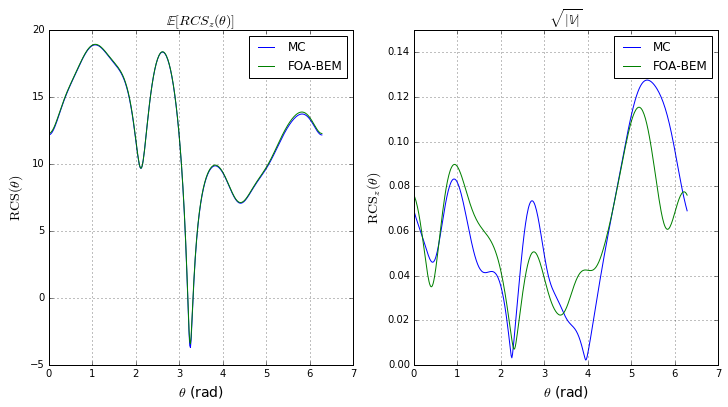

0.00656163280571 relative norm error RCS
0.270876123769 relative norm error var


In [21]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, (ax1, ax2)  = plt.subplots(1,2, figsize=(12,6))

cs = 10 * np.log10(4 * np.pi * np.abs(Umean_MC)**2)
#cs1 = 10 * np.log10(4 * np.pi * np.abs(Umean1)**2)
cs1 = 10 * np.log10(4 * np.pi * np.abs(Umeans)**2)

ax1.plot(angles, cs, label='MC')
ax1.plot(angles, cs1, label='FOA-BEM')


y = np.sqrt(np.abs(Uvar_MC))
#y1 = np.sqrt(np.abs(Uvars))
y1 = np.sqrt(np.abs(Varstr))

#y = 10 * np.log10(4 * np.pi * y **2)
#y1 = 10 * np.log10(4 * np.pi * y1 ** 2)
ax2.plot(angles, y, label = 'MC')
ax2.plot(angles, y1, label = 'FOA-BEM')
ax1.set_title(r'$\mathbb{E}[RCS_z(\theta)]$', fontsize=14)
ax2.set_title(r'$\sqrt{|\mathbb{V}|}$', fontsize=14)


ax2.set_xlabel(r'$\theta$ (rad)', fontsize=14)
ax2.set_ylabel(r'$\mathrm{RCS}_z(\theta)$', fontsize=14)


ax1.set_xlabel(r'$\theta$ (rad)', fontsize=14)
ax1.set_ylabel(r'$\mathrm{RCS}(\theta)$', fontsize=14)

ax1.legend()
ax1.grid()
ax2.set_ylim(-3, 22)

ax2.legend()
ax2.grid()
#ax2.set_ylim(0, 0.09)
ax2.set_ylim(0, 0.15)
plt.show(block=False)

print(np.linalg.norm(cs-cs1) / np.linalg.norm(cs), 'relative norm error RCS')
print(np.linalg.norm(y-y1) / np.linalg.norm(y), 'relative norm error var')